In [15]:
import warnings
warnings.filterwarnings("ignore")

# Importing libraries

In [131]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load data

In [2]:
kickstarter_df = pd.read_csv("./inputs/kickstarter_data_full.csv", low_memory=False)


# Drop unnecessary columns

In [3]:
kickstarter_df.drop(columns=["index", "Unnamed: 0"], inplace=True)


# Naive feature selection

In [4]:
kickstarter_df.drop(columns="id", inplace=True)


In [5]:
kickstarter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        20632 non-null  object 
 1   name                         20632 non-null  object 
 2   blurb                        20626 non-null  object 
 3   goal                         20632 non-null  float64
 4   pledged                      20632 non-null  float64
 5   state                        20632 non-null  object 
 6   slug                         20632 non-null  object 
 7   disable_communication        20632 non-null  bool   
 8   country                      20632 non-null  object 
 9   currency                     20632 non-null  object 
 10  currency_symbol              20632 non-null  object 
 11  currency_trailing_code       20632 non-null  bool   
 12  deadline                     20632 non-null  object 
 13  state_changed_at

# Remove features with more that 50% missing values

In [6]:
kickstarter_df.drop(
    columns=["friends", "is_starred", "is_backing", "permissions"], inplace=True
)


# Remove features with zero variance

In [7]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


Series([], dtype: int64)

# Check rows with missing values

In [8]:
kickstarter_df.isnull().any(axis=1).sum()

1937

In [9]:
kickstarter_df[kickstarter_df[["currency", "pledged"]].isnull().any(axis=1)]

,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend


# Check the cases of the "SuccessfulBool" (dependent) variable

In [10]:
kickstarter_df["SuccessfulBool"].value_counts()

SuccessfulBool
0    14614
1     6018
Name: count, dtype: int64

# Hyphotesis 4: Is features like "currency" and "pleded" associatet with successness?

In [27]:
h4_df = kickstarter_df[
    ["currency", "pledged", "usd_pledged", "static_usd_rate", "SuccessfulBool"]
]


In [28]:
h4_df

,currency,pledged,usd_pledged,static_usd_rate,SuccessfulBool
0,USD,0.0,0.000000,1.000000,0
1,USD,0.0,0.000000,1.000000,0
2,USD,120.0,120.000000,1.000000,0
3,USD,0.0,0.000000,1.000000,0
4,EUR,356.0,396.802395,1.114613,0
...,...,...,...,...,...
20627,CHF,25868.0,25886.197879,1.000703,0
20628,EUR,1559.0,1644.428040,1.054797,0
20629,USD,0.0,0.000000,1.000000,0
20630,USD,0.0,0.000000,1.000000,0


# Convert to USD

In [29]:
def covert_to_usd(row, col_name):
    return (
        row[col_name] * row["static_usd_rate"]
        if row["static_usd_rate"] != 1
        else row[col_name]
    )


In [30]:
h4_df["usd_pledged"] = h4_df.apply(covert_to_usd, args=("pledged",), axis=1)

In [31]:
h4_df

,currency,pledged,usd_pledged,static_usd_rate,SuccessfulBool
0,USD,0.0,0.000000,1.000000,0
1,USD,0.0,0.000000,1.000000,0
2,USD,120.0,120.000000,1.000000,0
3,USD,0.0,0.000000,1.000000,0
4,EUR,356.0,396.802395,1.114613,0
...,...,...,...,...,...
20627,CHF,25868.0,25886.197879,1.000703,0
20628,EUR,1559.0,1644.428040,1.054797,0
20629,USD,0.0,0.000000,1.000000,0
20630,USD,0.0,0.000000,1.000000,0


# Remove unnecessary columns

In [32]:
h4_df.drop(columns=["static_usd_rate", "pledged"], inplace=True)

In [33]:
h4_df

,currency,usd_pledged,SuccessfulBool
0,USD,0.000000,0
1,USD,0.000000,0
2,USD,120.000000,0
3,USD,0.000000,0
4,EUR,396.802395,0
...,...,...,...
20627,CHF,25886.197879,0
20628,EUR,1644.428040,0
20629,USD,0.000000,0
20630,USD,0.000000,0


# Convert currency into dummies

In [34]:
currency_dummies = pd.get_dummies(h4_df["currency"], prefix="currency", drop_first=True)

In [35]:
# conert to int
currency_dummies = currency_dummies.astype(int)

In [36]:
currency_dummies

,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20627,0,1,0,0,0,0,0,0,0,0,0,0
20628,0,0,0,1,0,0,0,0,0,0,0,0
20629,0,0,0,0,0,0,0,0,0,0,0,1
20630,0,0,0,0,0,0,0,0,0,0,0,1


## Add the dummies to the h4_df and remove original column

In [37]:
h4_df = pd.concat([h4_df, currency_dummies], axis=1)

In [38]:
h4_df.drop(columns="currency", inplace=True)

In [39]:
h4_df.head()

,usd_pledged,SuccessfulBool,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
2,120.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
4,396.802395,0,0,0,0,1,0,0,0,0,0,0,0,0


# Feature importance

In [40]:
# xgboost for feature importance on a classification problem
import plotly.graph_objects as go
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(
    h4_df.drop(columns=["SuccessfulBool"]),
    h4_df["SuccessfulBool"],
)
feature_importance_df = pd.DataFrame(
    {
        "feature": h4_df.drop(columns=["SuccessfulBool"]).columns,
        "importance": xgb_model.feature_importances_,
    }
)
feature_importance_df.sort_values(by="importance", ascending=False, inplace=True)
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=feature_importance_df["feature"],
        y=feature_importance_df["importance"],
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Feature Importance",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


### We see that xgboost model show high importance for usd_pledged (coverted amount to USD) and currencies like GBP and EUR. USD have low impact on the model. We can drop all currencies except GBP and EUR and keep usd_pledged.

In [41]:
h4_df.drop(
    columns=[
        col
        for col in h4_df.columns
        if col not in ["SuccessfulBool", "usd_pledged", "currency_GBP", "currency_EUR"]
    ],
    inplace=True,
)


In [42]:
h4_df.head()

,usd_pledged,SuccessfulBool,currency_EUR,currency_GBP
0,0.000000,0,0,0
1,0.000000,0,0,0
2,120.000000,0,0,0
3,0.000000,0,0,0
4,396.802395,0,1,0


# Split into X and y again

In [43]:
X = h4_df.drop(columns="SuccessfulBool")
y = h4_df["SuccessfulBool"]

# Split into train and test again

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define a new model

In [47]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

# Fit the new model

In [48]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

# Predict and results

In [50]:
predictions_logistic_regression_train = logistic_regression_model.predict(X_train)
predictions_logistic_regression_test = logistic_regression_model.predict(X_test)

In [52]:
train_results_logistic_regression = pd.DataFrame(
    {"Actual": y_train, "Predicted": predictions_logistic_regression_train}
)
test_results_logistic_regression = pd.DataFrame(
    {"Actual": y_test, "Predicted": predictions_logistic_regression_test}
)


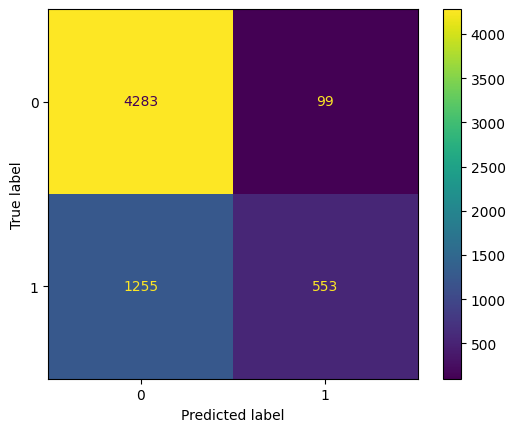

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions_logistic_regression_test)
ConfusionMatrixDisplay(cm).plot()

In [56]:
from sklearn.metrics import classification_report
print("Logistic Regression Results (train):")
print(classification_report(y_train, predictions_logistic_regression_train))
print("Logistic Regression Results (test):")
print(classification_report(y_test, predictions_logistic_regression_test))

Logistic Regression Results (train):
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     10232
           1       0.84      0.30      0.44      4210

    accuracy                           0.78     14442
   macro avg       0.81      0.64      0.65     14442
weighted avg       0.79      0.78      0.74     14442

Logistic Regression Results (test):
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      4382
           1       0.85      0.31      0.45      1808

    accuracy                           0.78      6190
   macro avg       0.81      0.64      0.66      6190
weighted avg       0.80      0.78      0.74      6190



In [58]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
predictions_proba = logistic_regression_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, predictions_logistic_regression_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba[:, 1])

In [61]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name="ROC curve (area = %0.2f)" % roc_auc,
        line=dict(color="darkorange", width=2),
        text=thresholds,
        hovertemplate="fpr: %{x:.2f}<br>tpr: %{y:.2f}<br>threshold: %{text:.2f}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        name="Random guess",
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    title="Receiver Operating Characteristic",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

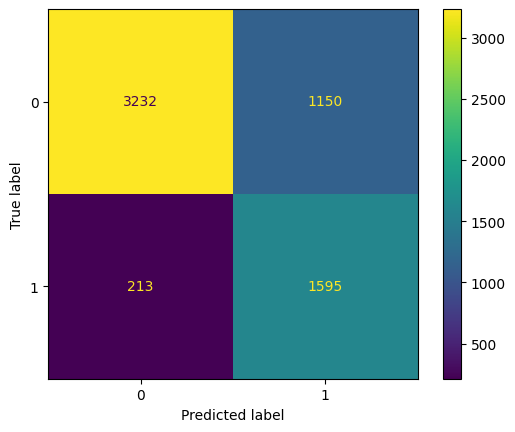

In [62]:
# logistic regression threshold 0.215
predictions_logistic_regression_test_threshold = [
    1 if x >= 0.215 else 0 for x in predictions_proba[:, 1]
]
cm = confusion_matrix(y_test, predictions_logistic_regression_test_threshold)
ConfusionMatrixDisplay(cm).plot()

In [63]:
print(classification_report(y_test, predictions_logistic_regression_test_threshold))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      4382
           1       0.58      0.88      0.70      1808

    accuracy                           0.78      6190
   macro avg       0.76      0.81      0.76      6190
weighted avg       0.83      0.78      0.79      6190



# KNN

In [64]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=51)

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=51)

In [84]:
predictions_knn_train = knn.predict(X_train)
predictions_knn_test = knn.predict(X_test)

In [85]:
train_results_knn = pd.DataFrame(
    {"Actual": y_train, "Predicted": predictions_knn_train}
)
test_results_knn = pd.DataFrame({"Actual": y_test, "Predicted": predictions_knn_test})


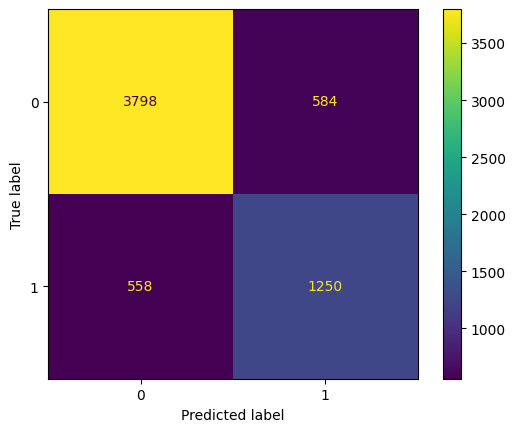

In [86]:
cm = confusion_matrix(y_test, predictions_knn_test)
ConfusionMatrixDisplay(cm).plot()

In [73]:
print("KNN Results (train):")
print(classification_report(y_train, predictions_knn_train))
print("KNN Results (test):")
print(classification_report(y_test, predictions_knn_test))

KNN Results (train):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10232
           1       0.74      0.71      0.72      4210

    accuracy                           0.84     14442
   macro avg       0.81      0.80      0.81     14442
weighted avg       0.84      0.84      0.84     14442

KNN Results (test):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4382
           1       0.66      0.64      0.65      1808

    accuracy                           0.80      6190
   macro avg       0.75      0.75      0.75      6190
weighted avg       0.80      0.80      0.80      6190



In [80]:
l = []
for i in range(1, 201, 2):
    knni = KNeighborsClassifier(n_neighbors=i)
    knni.fit(X_train, y_train)
    predictions_knni_test = knni.predict(X_test)
    l.append((i, knni.score(X_test, y_test)))

In [81]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs K",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

# Random forest

In [74]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [122]:
rnf_model = RandomForestClassifier(300, random_state=42, criterion="entropy", max_depth=9)

In [123]:
rnf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=300,
                       random_state=42)

In [124]:
predictions_rnf_train = rnf_model.predict(X_train)
predictions_rnf_test = rnf_model.predict(X_test)

In [125]:
train_results_rnf = pd.DataFrame(
    {"Actual": y_train, "Predicted": predictions_rnf_train}
)
test_results_rnf = pd.DataFrame({"Actual": y_test, "Predicted": predictions_rnf_test})


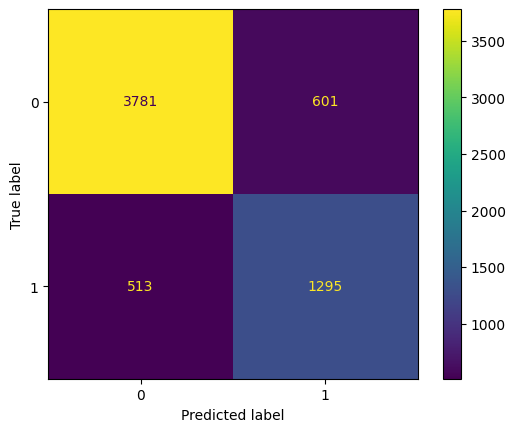

In [126]:
cm = confusion_matrix(y_test, predictions_rnf_test)
ConfusionMatrixDisplay(cm).plot()

In [127]:
print("Random Forest Results (train):")
print(classification_report(y_train, predictions_rnf_train))
print("Random Forest Results (test):")
print(classification_report(y_test, predictions_rnf_test))

Random Forest Results (train):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     10232
           1       0.71      0.73      0.72      4210

    accuracy                           0.84     14442
   macro avg       0.80      0.80      0.80     14442
weighted avg       0.84      0.84      0.84     14442

Random Forest Results (test):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4382
           1       0.68      0.72      0.70      1808

    accuracy                           0.82      6190
   macro avg       0.78      0.79      0.79      6190
weighted avg       0.82      0.82      0.82      6190



In [96]:
l = []
for i in range(100, 1000, 100):
    print(i, end="\r")
    rfi = RandomForestClassifier(i, random_state=42, criterion="entropy")
    rfi.fit(X_train, y_train)
    predictions_i = rfi.predict(X_test)
    l.append((i, rfi.score(X_test, y_test)))

In [97]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs n_estimators",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()
    

In [ ]:
# run on two ranges with different step sizes
l = []
for i in range(100, 1000, 100):
    # for model with 100-1000 estimators each estimator run 10 times with different max_depth
    for j in range(1, 11):
        print(i, j, )
        rfi = RandomForestClassifier(i, random_state=42, criterion="entropy", max_depth=j)
        rfi.fit(X_train, y_train)
        predictions_logistic_regression = rfi.predict(X_test)
        l.append((i, j, rfi.score(X_test, y_test)))


In [129]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=[i[0] for i in l],
        y=[i[1] for i in l],    
        z=[i[2] for i in l],
        mode="markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs n_estimators vs max_depth",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

In [134]:
l.sort(key=lambda x: x[2], reverse=True)

In [135]:
l[0]

(300, 9, 0.820032310177706)